In [23]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# 없을때

In [24]:
import csv
import numpy as np
import pandas as pd
data1 = pd.read_csv("yes/Float_recording31.csv", header=None)
data1 = np.array(data1)
data1 = np.concatenate(data1, axis=None)

for i in range(501,700):    
    a = pd.read_csv("yes/Float_recording"+ str(i) +".csv", header=None)
    a = np.array(a)
    a = np.concatenate(a, axis=None)
    data1 = np.vstack((data1,a))

data1

array([[-4.91686761e-02, -5.24529628e-02, -3.89299430e-02, ...,
         7.78052490e-05,  1.08491608e-04,  4.45719306e-05],
       [-4.89479564e-02, -5.23567833e-02, -3.92126441e-02, ...,
         7.63783391e-05,  8.03138610e-05,  1.72917607e-05],
       [-4.84894887e-02, -5.17830104e-02, -3.89348790e-02, ...,
         7.93165527e-05,  7.57492671e-05,  3.13077544e-05],
       ...,
       [-4.94713970e-02, -5.29342294e-02, -3.96963842e-02, ...,
         3.44837899e-05,  3.50668306e-05, -5.60025956e-06],
       [-4.97591756e-02, -5.32698147e-02, -3.98111790e-02, ...,
         3.35478580e-05,  2.56000912e-05, -1.08936556e-05],
       [-4.94738929e-02, -5.29006608e-02, -3.96814160e-02, ...,
         6.39733771e-05,  6.76940981e-05,  5.50820050e-06]])

In [25]:
data1.shape

(200L, 180L)

# 있을때

In [26]:
data2 = pd.read_csv("no/Float_recording31.csv", header=None)
data2 = np.array(data2)
data2 = np.concatenate(data2, axis=None)

for i in range(199):    
    a = pd.read_csv("no/Float_recording"+ str(i) +".csv", header=None)
    a = np.array(a)
    a = np.concatenate(a, axis=None)
    data2 = np.vstack((data2,a))

data2

array([[-4.96048369e-02, -5.32979332e-02, -4.01677005e-02, ...,
         2.04908138e-05,  1.08015965e-05, -1.18142470e-05],
       [-4.91474345e-02, -5.27077280e-02, -3.97475287e-02, ...,
         6.06055494e-07, -2.10661819e-05, -3.27960406e-05],
       [-4.92230467e-02, -5.27830385e-02, -3.98781523e-02, ...,
        -6.77401295e-06,  5.32408239e-06, -1.81356354e-05],
       ...,
       [-5.16899154e-02, -5.59000596e-02, -4.18093130e-02, ...,
        -1.27962103e-05, -7.55651490e-06, -3.80664242e-05],
       [-5.17913103e-02, -5.60434945e-02, -4.20186110e-02, ...,
         1.40313359e-05,  1.46527345e-05, -1.47371220e-05],
       [-5.15945330e-02, -5.57242557e-02, -4.17579822e-02, ...,
         3.77288743e-05,  5.11234684e-05,  1.67777653e-05]])

In [27]:
data2.shape

(200L, 180L)

In [28]:
data = np.vstack((data1,data2))
x_train = data

In [29]:
arr = np.zeros((200,1))
y_train1 = (arr == 500)

In [30]:
arr = np.zeros((200,1))
y_train2 = (arr != 500)

In [31]:
y_train = np.vstack((y_train1,y_train2))

In [32]:
y_train.shape

(400L, 1L)

In [33]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)

In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[134,  66],
       [134,  66]], dtype=int64)

In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.5, 0.5, 0.5])

In [37]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred)

0.5

In [38]:
recall_score(y_train, y_train_pred)

0.33

In [39]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.39759036144578314

In [41]:
some_digit = x_train[100]
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([0.81786885])

In [42]:
threshold = 0.9
y_some_digit_pred = (y_scores > threshold)

In [43]:
y_some_digit_pred

array([False])

In [45]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train, cv=3,method="decision_function")
y_scores

array([-3.55518894, -3.55656659, -3.56404026, -3.55362039, -3.54428234,
       -3.55569432, -3.58038686, -3.54757171, -3.556352  , -3.54867209,
       -3.54451814, -3.56327336, -3.574315  , -3.56399186, -3.56774962,
       -3.56097203, -3.56293982, -3.62439423, -3.54716197, -3.55693045,
       -3.56014955, -3.5589356 , -3.53957387, -3.55162355, -3.56777888,
       -3.55055551, -3.55448305, -3.56484802, -3.56674413, -3.55416277,
       -3.55734662, -3.55661895, -3.56592531, -3.56583075, -3.55965985,
       -3.56500589, -3.54260853, -3.55718292, -3.55392912, -3.53628756,
       -3.5549186 , -3.54927672, -3.58794991, -3.56832912, -3.58669392,
       -3.56007077, -3.55349337, -3.54070562, -3.55980052, -3.57135086,
       -3.57821737, -3.56098033, -3.5833472 , -3.55911316, -3.5595839 ,
       -3.57507448, -3.55119364, -3.54522699, -3.55357895, -3.55569114,
       -3.55034613, -3.53215692, -3.54730712, -3.55221682, -3.56182605,
       -3.58172172, -3.57587307, -3.63998313, -3.63721906, -3.63

In [46]:
y_scores.shape

(400L,)

In [47]:
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [48]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [49]:
(y_train_pred == (y_scores > 0)).all()

True

In [50]:
y_train_pred_90 = (y_scores > 0.9)

In [51]:
precision_score(y_train, y_train_pred_90)

0.5

In [52]:
recall_score(y_train, y_train_pred_90)

0.33

In [53]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [54]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.653425

In [66]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf,x_train, y_train, cv=3, method="predict_proba")

In [67]:
from sklearn.metrics import roc_auc_score
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

In [68]:
roc_auc_score(y_train, y_scores_forest)

1.0

In [69]:
y_train_pred_forest = cross_val_predict(forest_clf, x_train, y_train, cv=3)
precision_score(y_train, y_train_pred_forest)

1.0

In [70]:
recall_score(y_train, y_train_pred_forest)

1.0

In [71]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest_clf, x_train, y_train, cv=3, scoring="accuracy")

array([1., 1., 1.])

# 5개로 나눔

In [84]:
datatest = pd.read_csv("test/Float_recording0.csv", header=None)
datatest = np.array(datatest)
datatest = np.concatenate(datatest, axis=None)

for i in range(100):    
    a = pd.read_csv("test/Float_recording"+ str(i) +".csv", header=None)
    a = np.array(a)
    a = np.concatenate(a, axis=None)
    datatest = np.vstack((datatest,a))

datatest

array([[-5.31013496e-02, -5.79873063e-02, -4.39663567e-02, ...,
        -2.23089792e-05, -2.43419508e-05,  1.13155929e-05],
       [-5.31013496e-02, -5.79873063e-02, -4.39663567e-02, ...,
        -2.23089792e-05, -2.43419508e-05,  1.13155929e-05],
       [-5.31961322e-02, -5.81681021e-02, -4.40712757e-02, ...,
        -1.81663218e-05, -2.40657737e-05, -1.69542113e-06],
       ...,
       [-5.09131737e-02, -5.49869314e-02, -4.17868830e-02, ...,
         1.04487035e-05, -2.04831413e-05, -1.41847677e-05],
       [-5.14034964e-02, -5.57217859e-02, -4.24313508e-02, ...,
         1.31030738e-05,  1.51820741e-05,  2.68812473e-05],
       [-5.20030670e-02, -5.65406457e-02, -4.30195630e-02, ...,
         1.02569138e-05, -6.97347423e-06, -1.53431770e-07]])

In [85]:
data3 = pd.read_csv("1/Float_recording0.csv", header=None)
data3 = np.array(data3)
data3 = np.concatenate(data3, axis=None)

for i in range(100):    
    a = pd.read_csv("1/Float_recording"+ str(i) +".csv", header=None)
    a = np.array(a)
    a = np.concatenate(a, axis=None)
    data3 = np.vstack((data3,a))

data3

array([[-5.11591248e-02, -5.52019291e-02, -4.14246134e-02, ...,
        -1.27148916e-04, -1.18265212e-04, -4.89370650e-05],
       [-5.11591248e-02, -5.52019291e-02, -4.14246134e-02, ...,
        -1.27148916e-04, -1.18265212e-04, -4.89370650e-05],
       [-5.02446555e-02, -5.41550964e-02, -4.08608839e-02, ...,
        -7.72298808e-05, -1.04118801e-04, -4.82236064e-05],
       ...,
       [-4.84249406e-02, -5.20267524e-02, -3.93888354e-02, ...,
        -1.12081914e-04, -1.30470711e-04, -7.16219511e-05],
       [-4.83406596e-02, -5.17759435e-02, -3.91725898e-02, ...,
        -9.35473508e-05, -7.25885693e-05, -9.98840824e-06],
       [-4.77790087e-02, -5.11156097e-02, -3.86752114e-02, ...,
        -1.26389423e-04, -1.13033188e-04, -3.23050590e-05]])

In [86]:
y_train1 = np.full((101,1), 1)

In [87]:
data4 = pd.read_csv("2/Float_recording0.csv", header=None)
data4 = np.array(data4)
data4 = np.concatenate(data4, axis=None)

for i in range(100):    
    a = pd.read_csv("2/Float_recording"+ str(i) +".csv", header=None)
    a = np.array(a)
    a = np.concatenate(a, axis=None)
    data4 = np.vstack((data4,a))

data4

array([[-4.72414196e-02, -5.04749715e-02, -3.87418978e-02, ...,
        -7.86414530e-05, -7.30718821e-05, -4.38354582e-05],
       [-4.72414196e-02, -5.04749715e-02, -3.87418978e-02, ...,
        -7.86414530e-05, -7.30718821e-05, -4.38354582e-05],
       [-4.97022904e-02, -5.35117388e-02, -4.06842008e-02, ...,
        -2.92747827e-05, -2.06135592e-05, -8.29298733e-06],
       ...,
       [-4.83250804e-02, -5.18867671e-02, -3.97020690e-02, ...,
        -6.67428249e-05, -6.66737760e-05, -3.62175706e-05],
       [-4.75222543e-02, -5.08920550e-02, -3.91035751e-02, ...,
        -5.18829547e-05, -4.63363940e-05, -3.56115161e-05],
       [-4.73087989e-02, -5.05442321e-02, -3.88167202e-02, ...,
        -7.14608468e-05, -6.42879168e-05, -5.17678818e-05]])

In [88]:
y_train2 = np.full((101,1), 2)

In [89]:
data5 = pd.read_csv("3/Float_recording0.csv", header=None)
data5 = np.array(data5)
data5 = np.concatenate(data5, axis=None)

for i in range(100):    
    a = pd.read_csv("3/Float_recording"+ str(i) +".csv", header=None)
    a = np.array(a)
    a = np.concatenate(a, axis=None)
    data5 = np.vstack((data5,a))

data5

array([[-4.88618612e-02, -5.25819510e-02, -4.00952734e-02, ...,
        -4.46870035e-05, -7.30335232e-05, -5.11004509e-05],
       [-4.88618612e-02, -5.25819510e-02, -4.00952734e-02, ...,
        -4.46870035e-05, -7.30335232e-05, -5.11004509e-05],
       [-4.96095642e-02, -5.35706356e-02, -4.09138389e-02, ...,
        -2.59913431e-05, -6.44183310e-05, -6.31525181e-05],
       ...,
       [-4.91429158e-02, -5.29044494e-02, -4.03065421e-02, ...,
        -4.95584645e-05, -6.28763446e-05, -1.01341684e-05],
       [-4.97923531e-02, -5.37361801e-02, -4.09154072e-02, ...,
        -1.74068355e-05, -4.63363940e-05, -1.78671307e-05],
       [-4.80637699e-02, -5.17000854e-02, -3.95464264e-02, ...,
        -5.16758228e-05, -9.12688920e-05, -5.18599409e-05]])

In [90]:
y_train3 = np.full((101,1), 3)

In [91]:
data6 = pd.read_csv("4/Float_recording0.csv", header=None)
data6 = np.array(data6)
data6 = np.concatenate(data6, axis=None)

for i in range(100):    
    a = pd.read_csv("4/Float_recording"+ str(i) +".csv", header=None)
    a = np.array(a)
    a = np.concatenate(a, axis=None)
    data6 = np.vstack((data6,a))

data6

array([[-5.05165979e-02, -5.46923578e-02, -4.16586734e-02, ...,
        -7.40461765e-05, -1.12319729e-04, -8.81849119e-05],
       [-5.05165979e-02, -5.46923578e-02, -4.16586734e-02, ...,
        -7.40461765e-05, -1.12319729e-04, -8.81849119e-05],
       [-5.13294563e-02, -5.57656139e-02, -4.23452817e-02, ...,
        -5.44145769e-05, -8.25462921e-05, -5.30336911e-05],
       ...,
       [-4.85114604e-02, -5.22258207e-02, -3.99978831e-02, ...,
        -2.95739737e-05, -4.78093425e-05, -2.15571636e-05],
       [-4.90883626e-02, -5.28488979e-02, -4.03985716e-02, ...,
        -1.16301280e-05, -3.34174401e-05, -1.50439855e-05],
       [-4.97138910e-02, -5.37583902e-02, -4.09609377e-02, ...,
        -7.35398498e-05, -9.44142448e-05, -6.41651714e-05]])

In [92]:
y_train4 = np.full((101,1), 4)

In [93]:
data7 = pd.read_csv("5/Float_recording0.csv", header=None)
data7 = np.array(data7)
data7 = np.concatenate(data7, axis=None)

for i in range(100):    
    a = pd.read_csv("5/Float_recording"+ str(i) +".csv", header=None)
    a = np.array(a)
    a = np.concatenate(a, axis=None)
    data7 = np.vstack((data7,a))

data7

array([[-4.75545898e-02, -5.12547754e-02, -3.93875614e-02, ...,
        -3.68389701e-05, -6.72798342e-05, -5.35937179e-05],
       [-4.75545898e-02, -5.12547754e-02, -3.93875614e-02, ...,
        -3.68389701e-05, -6.72798342e-05, -5.35937179e-05],
       [-4.96272370e-02, -5.37037663e-02, -4.10645939e-02, ...,
        -4.36359951e-05, -6.80776793e-05, -5.15607462e-05],
       ...,
       [-5.01272269e-02, -5.42323925e-02, -4.13805246e-02, ...,
        -6.58222325e-06, -6.27229092e-05, -5.26117547e-05],
       [-4.91481312e-02, -5.31210415e-02, -4.08180542e-02, ...,
        -1.17221871e-05, -7.88025573e-05, -7.85570664e-05],
       [-4.98498678e-02, -5.40114120e-02, -4.13474925e-02, ...,
        -8.81542292e-05, -1.19093740e-04, -8.64818212e-05]])

In [94]:
y_train5 = np.full((101,1), 5)

In [95]:
data8 = np.vstack((data3,data4))
data8 = np.vstack((data8,data5))
data8 = np.vstack((data8,data6))
data8 = np.vstack((data8,data7))

In [96]:
data8.shape

(505L, 180L)

In [97]:
x_train6 = data8
x_train6.shape

(505L, 180L)

In [98]:
y_train6 = np.vstack((y_train1,y_train2))
y_train6 = np.vstack((y_train6,y_train3))
y_train6 = np.vstack((y_train6,y_train4))
y_train6 = np.vstack((y_train6,y_train5))

In [99]:
y_train6.shape

(505L, 1L)

In [100]:
some_digit = x_train6[250]
sgd_clf.fit(x_train6, y_train6)
sgd_clf.predict([some_digit])

array([5])

In [101]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-1.01331303, -1.02005554, -0.99974349, -1.00254734,  1.86750041]])

In [102]:
np.argmax(some_digit_scores)

4

In [103]:
sgd_clf.classes_

array([1, 2, 3, 4, 5])

In [104]:
sgd_clf.classes_[4]

5

In [105]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(x_train6, y_train6)
ovo_clf.predict([some_digit])

array([5])

In [106]:
len(ovo_clf.estimators_)

10

In [107]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
import pandas as pd
y_train6 = pd.DataFrame(y_train6)
y_probas_forest = cross_val_predict(forest_clf, x_train6, y_train6, cv=3, method="predict_proba")
forest_clf.fit(x_train6, y_train6)

C:\Users\Ubicomp_Lab\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [108]:
forest_clf.predict([some_digit])

array([3])

In [109]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 1., 0., 0.]])

In [110]:
cross_val_score(forest_clf, x_train6, y_train6, cv=3, scoring="accuracy")

array([0.99411765, 1.        , 1.        ])

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train6.astype(np.float64))
cross_val_score(forest_clf, X_train_scaled, y_train6, cv=3, scoring="accuracy")

array([0.99411765, 1.        , 1.        ])

In [112]:
y_train_pred = cross_val_predict(forest_clf, X_train_scaled, y_train6, cv=3)
conf_mx = confusion_matrix(y_train6, y_train_pred)
conf_mx

array([[101,   0,   0,   0,   0],
       [  0, 101,   0,   0,   0],
       [  0,   0, 100,   1,   0],
       [  0,   0,   0, 101,   0],
       [  0,   0,   0,   0, 101]], dtype=int64)

In [113]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

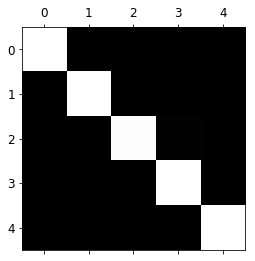

In [140]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [141]:
cross_val_score(sgd_clf, x_train6, y_train6, cv=3, scoring="accuracy")

array([0.2, 0.2, 0.2])

In [142]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train6.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train6, cv=3, scoring="accuracy")

array([1., 1., 1.])

In [143]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train6, cv=3)
conf_mx = confusion_matrix(y_train6, y_train_pred)
conf_mx

array([[101,   0,   0,   0,   0],
       [  0, 101,   0,   0,   0],
       [  0,   0, 101,   0,   0],
       [  0,   0,   0, 101,   0],
       [  0,   0,   0,   0, 101]], dtype=int64)

In [144]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

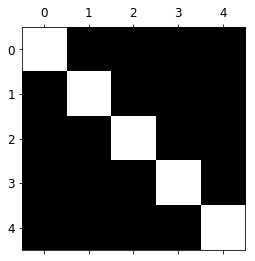

In [145]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [146]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

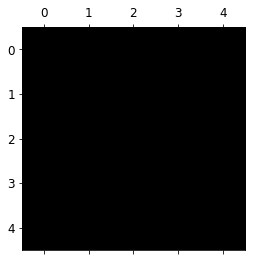

In [147]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# 다항 특성 선형 scv

In [148]:
x_train6

array([[-5.11591248e-02, -5.52019291e-02, -4.14246134e-02, ...,
        -1.27148916e-04, -1.18265212e-04, -4.89370650e-05],
       [-5.11591248e-02, -5.52019291e-02, -4.14246134e-02, ...,
        -1.27148916e-04, -1.18265212e-04, -4.89370650e-05],
       [-5.02446555e-02, -5.41550964e-02, -4.08608839e-02, ...,
        -7.72298808e-05, -1.04118801e-04, -4.82236064e-05],
       ...,
       [-5.01272269e-02, -5.42323925e-02, -4.13805246e-02, ...,
        -6.58222325e-06, -6.27229092e-05, -5.26117547e-05],
       [-4.91481312e-02, -5.31210415e-02, -4.08180542e-02, ...,
        -1.17221871e-05, -7.88025573e-05, -7.85570664e-05],
       [-4.98498678e-02, -5.40114120e-02, -4.13474925e-02, ...,
        -8.81542292e-05, -1.19093740e-04, -8.64818212e-05]])

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(x_train6, y_train6)

In [ ]:
polynomial_svm_clf.predict(datatest)

In [ ]:
cross_val_score(forest_clf, x_train6, y_train6, cv=3, scoring="accuracy")

In [92]:
score_test

1.0

In [75]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(x_train6, y_train6)

Pipeline(memory=None,
     steps=[(u'scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), (u'svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel=u'poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [76]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(x_train6, y_train6)

Pipeline(memory=None,
     steps=[(u'scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), (u'svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto_deprecated',
  kernel=u'poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [77]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(x_train6, y_train6)

Pipeline(memory=None,
     steps=[(u'scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), (u'svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel=u'rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [78]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(x_train6, y_train6)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [79]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg.fit(x_train6, y_train6)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma=u'auto',
  kernel=u'poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# 결정트리

In [80]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(x_train6, y_train6)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [84]:
tree_clf.predict_proba(x_train6)
tree_clf.predict(x_train6)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(x_train6, y_train6)